In [1]:
from enforce_re import Enforce 
from datetime import datetime
import pandas as pd  

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [2]:
def parse(x):
    return datetime.strptime(x, '%m/%d/%Y')
    
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv', parse_dates = ['Bill_Date'],date_parser=parse)
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


Start of Fit.....
    Target variable given as = Billed_amount
Start of loading of data.....
    Inputs: ts_column = Bill_Date, sep = ,, target = ['Billed_amount']
    Using given input: pandas dataframe...
    Bill_Date column exists in given train data...
    train data shape = (50, 5)
Alert: Could not detect strf_time_format of Bill_Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
chart frequency not known. Continuing...
Time Interval between observations has not been provided. Auto_TS will try to infer this now...
Time series input in days = 31
It is a Monthly time series.


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(50, 6)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period

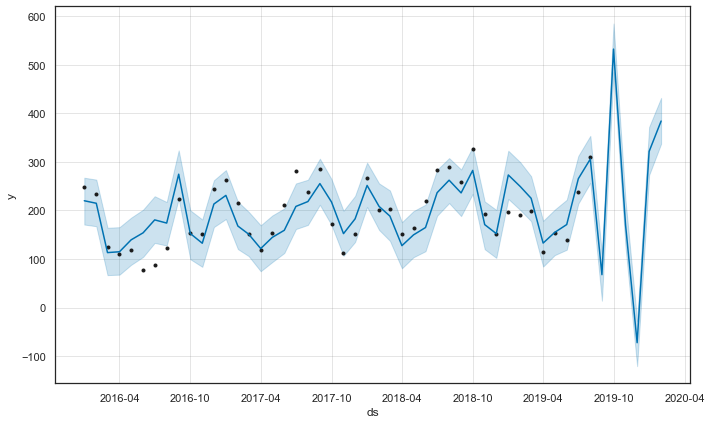

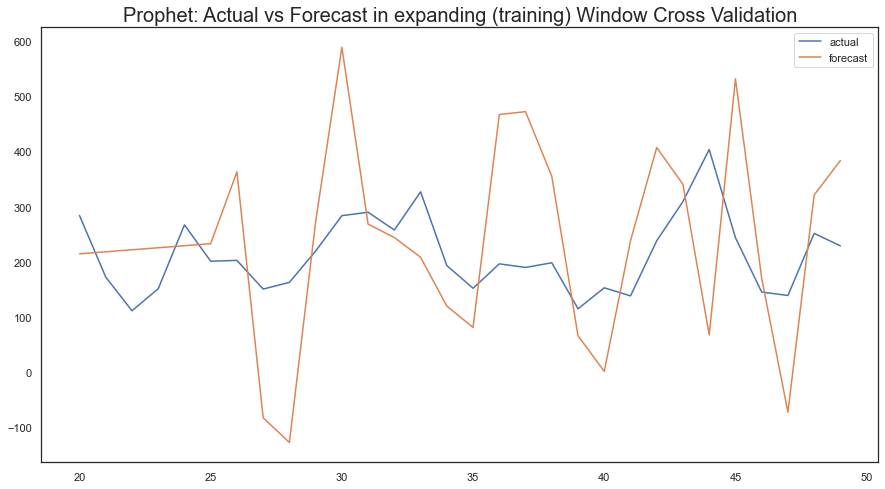

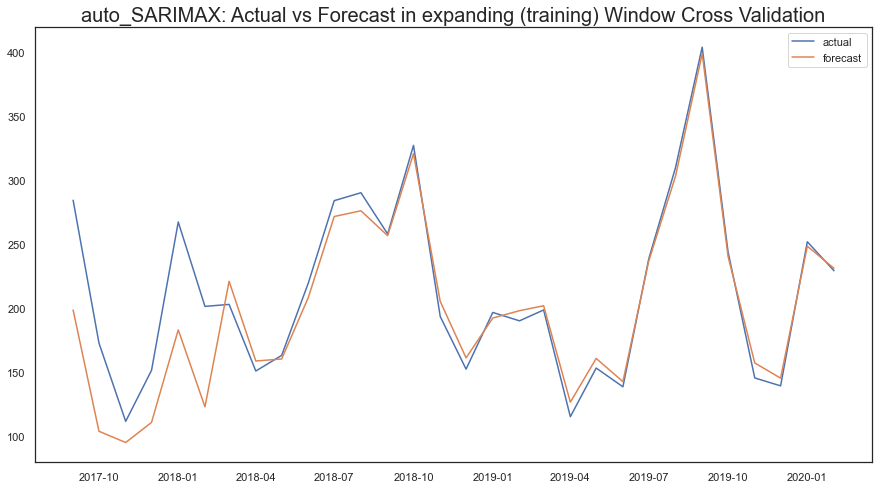

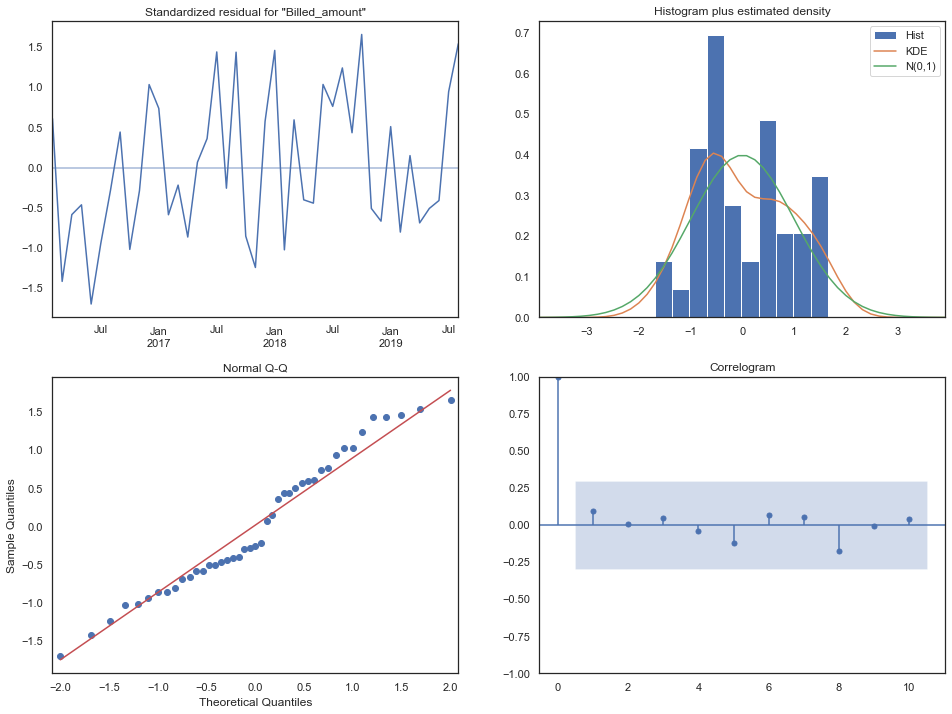

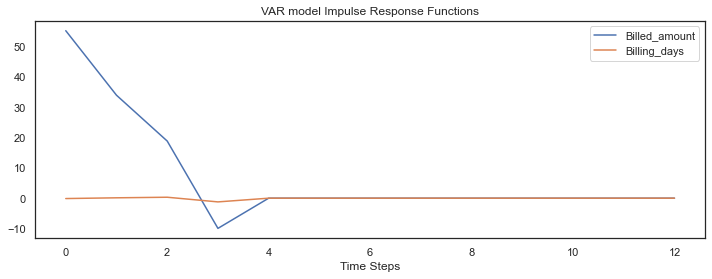

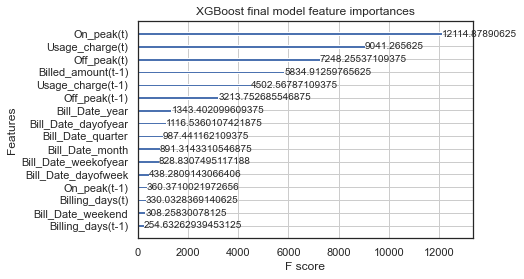

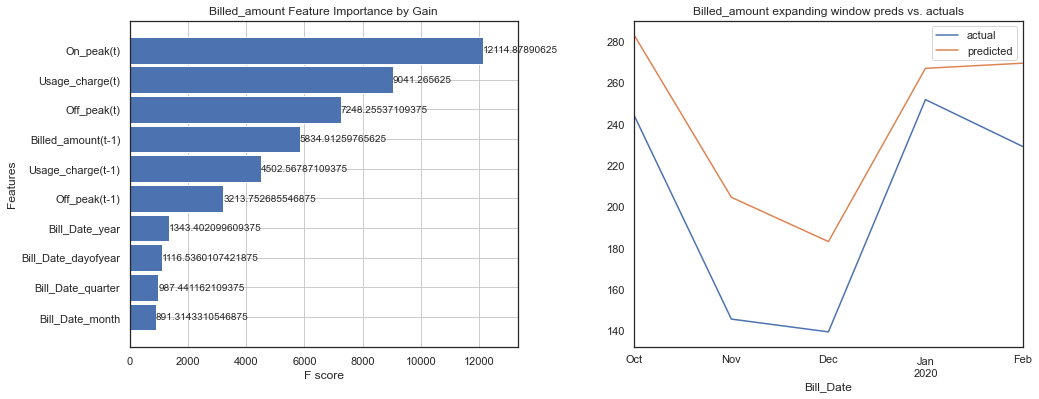

In [3]:
enf = Enforce( raw_data=df, target_name='Billed_amount', ts_name='Bill_Date',  data_split_ratio=0.96,filtering=True)
pred = enf.run()

In [4]:
enf.model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,19.961394
3,ML,41.889845
2,VAR,62.356453
0,Prophet,156.472520


Text(0.5, 1.0, 'RMSE')

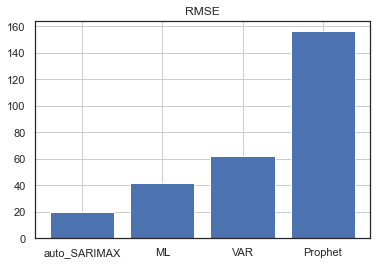

In [5]:
import matplotlib.pyplot as plt 
plt.bar(x =enf.model.get_leaderboard()['name'], height= enf.model.get_leaderboard()['rmse'])
plt.grid()
plt.title("RMSE")

In [6]:
enf.model.get_cv_scores()

,Model,CV Scores
0,Prophet,67.250155
1,Prophet,208.638760
2,Prophet,172.150920
3,Prophet,122.058955
4,Prophet,212.263809
5,auto_SARIMAX,67.458108
6,auto_SARIMAX,12.078623
7,auto_SARIMAX,7.542977
8,auto_SARIMAX,6.586450
9,auto_SARIMAX,6.140811


In [7]:
# test 

pred

Billed_amount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2020-03-01,173.492633,8.006077,157.801010,189.184255
2020-04-01,99.181604,8.026465,83.450020,114.913187
2020-05-01,138.907434,8.026569,123.175647,154.639220


In [9]:
enf.test

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
50,2020-03-01,151,1179.0,156.56,170.16,29
51,2020-04-01,75,625.0,87.27,94.85,29
52,2020-05-01,147,686.0,124.39,135.19,29


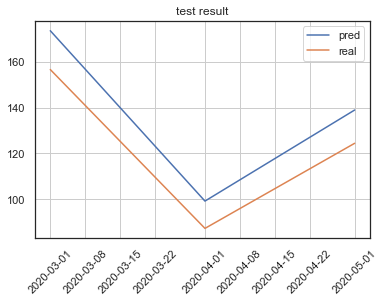

In [11]:
plt.plot(pred.index,pred['yhat'].values, label='pred')
plt.plot(pred.index, enf.test['Usage_charge'].values, label='real')
plt.legend()
plt.title("test result")
plt.xticks(rotation =45)
plt.grid()